<a href="https://colab.research.google.com/github/tibayo1/DL-Lung-Sounds/blob/master/Model_DL_Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rmse,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [0]:
path = \
"/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/"
os.chdir(path)
wav_file = []
import glob
wav_file_2 = glob.glob("*.wav")
for file in wav_file_2:
  y , sr = librosa.load(file,sr=None)
  feature_vector = get_feature_vector(y, sr)
  wav_file.append(feature_vector)
n_sounds = np.shape(wav_file)[0]


In [0]:
import csv
import pandas 

norm_output = 'normals_00.csv'
header =[
 'chroma_stft',
 'spectral_centroid',
 'spectral_bandwidth',
 'spectral_rolloff',
 'rmse',
 'zero_crossing_rate'
]
with open(norm_output,'+w') as f:
 csv_writer = csv.writer(f, delimiter = ',')
 csv_writer.writerow(header)
 csv_writer.writerows(wav_file)
df = pandas.read_csv('normals_00.csv')
print(df)

     chroma_stft  spectral_centroid  ...      rmse  zero_crossing_rate
0       0.800976         841.412422  ...  0.129435            0.004425
1       0.806921        1081.125707  ...  0.006667            0.003603
2       0.798877        1162.093864  ...  0.356550            0.004552
3       0.745374         763.405118  ...  0.043853            0.005789
4       0.837135        1199.866316  ...  0.146722            0.002904
..           ...                ...  ...       ...                 ...
915     0.752873        2276.516499  ...  0.222885            0.022957
916     0.815195        2622.460023  ...  0.121328            0.012208
917     0.803329        1134.139911  ...  0.149340            0.003421
918     0.807882        1406.229475  ...  0.301815            0.004846
919     0.813844         475.912697  ...  0.311752            0.001829

[920 rows x 6 columns]


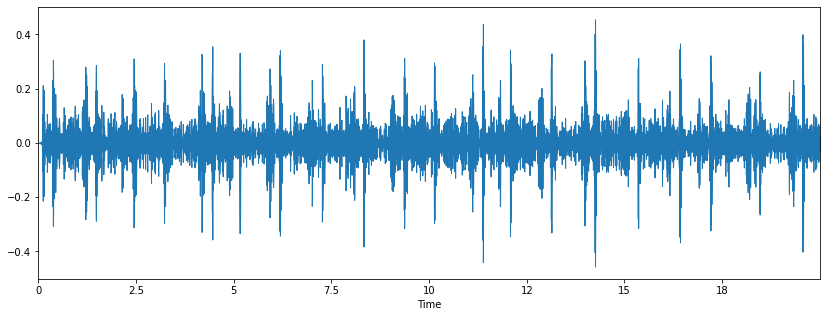

In [0]:
x, sr = librosa.load(path, sr=200)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

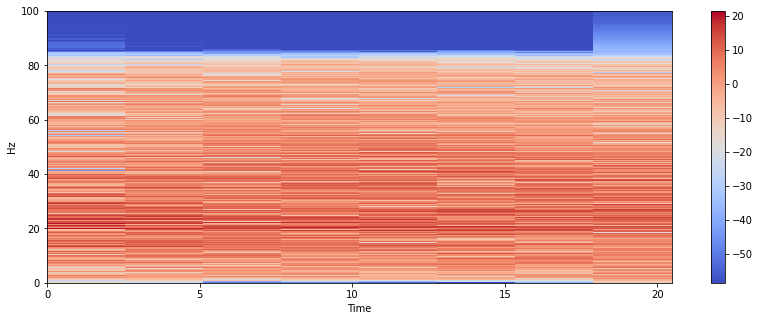

In [0]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

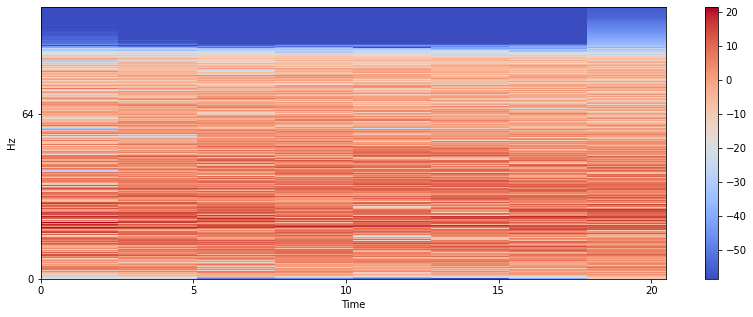

In [0]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

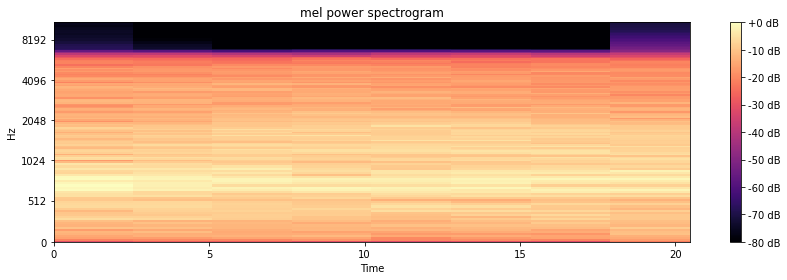

In [0]:

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

TypeError: ignored

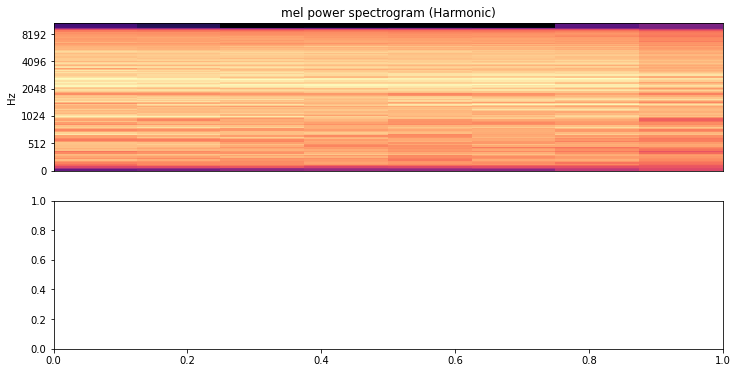

In [0]:
import librosa as lb
import librosa.display as lbdis
y_harmonic, y_percussive = lb.effects.hpss(x)
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = lb.feature.melspectrogram(y_harmonic)#, sr=sf)
S_percussive = lb.feature.melspectrogram(y_percussive)#, sr=sf)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = lb.power_to_db(S_harmonic, ref=np.max)
log_Sp = lb.power_to_db(S_percussive, ref=np.max)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
lbdis.specshow(log_Sh, sr=sf, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.subplot(2,1,2)
lbdis.specshow(log_Sp, sr=sf, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.tight_layout()